# Python Basics for Quants-2 (PBQ-2)

 #### Notebook updated  on: 20-02- 2020 by Ashutosh Dave
 #### This document builds on and is in continuation with the PBQ-1 document by Vivek Krishnamoorthy

### Today's Agenda

- A quick recap from the last lecture
    - Primitive and advanced datatypes
    - Control structures
    - Functions in Python
    
- Libraries/Packages in Python
    - Understanding the hierarchy
    - Importing and working with various modules
    
- The `NumPy` Library
    - Understanding the numpy ndarray data structure
    - Vectorization and how NumPy arrays are different from Python lists
    - Use-cases of various methods for NumPy arrays
    - Using mathematical functions from the NumPy library
     
- The `pandas` Library
    - Understanding pandas Series and DataFrames 
    - Series creation and manipulation
    - Use-cases of various methods for Series
    - DataFrame creation and manipulation
    - Reading and writing csv/excel data
    - Use-cases of various methods for DataFrames
    
- Some commonly done calculations in quantitative trading
    - Percentage change calculations
    - rolling() and shift() methods
    - Dealing with missing/naN data
  

In [94]:
# To display multiple outputs from the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Python Data Types & Data Structures

### Role of syntax in Determining the Data Type

In [95]:
# Syntax automatically determines the type in Python, hence pay attention to the syntax

a = 2
type(a)

int

In [96]:
a = 2.0
type(a)

float

In [97]:
a = '2'
type(a)

str

In [98]:
a = 2>3
type(a)

bool

### Data Structures

- Advanced data types(also called **data structures**) can hold multiple data points
- They are a handy way to store and manipulate data
- Select a data structure depending on the type of data and your requirements

In [99]:
# List: A collection of heterogenous or homogenous data points

top_stocks = ['MSFT', 'AAPL', 'TSLA']


In [100]:
# Info about a stock in a list

microsoft = ['MSFT', 210.9, 1800900]
type(microsoft)

list

In [101]:
# Info about a stock in a tuple, which is like an immutable list
# Use tuples when you want to safeguard the sanctity of data
# Tuples are more efficient but less flexible compared to a list

microsoft = ('MSFT', 210.9, 1800900)
type(microsoft)

tuple

In [102]:
# Dictionary: key-value pairs

microsoft = {'symbol':'MSFT', 'last_price':210.9, 'traded_volume': 1800900}
type(microsoft)

dict

In [103]:
microsoft['last_price']

210.9

![](pbq_pic1.png)

In [104]:
# A set contains a collection of unique unordered elements
# Set can only have unique elements unlike lists

set = {'a','a','u'}
set

{'a', 'u'}

In [105]:
# Ordering of elements is not an issue in case of sets
{'a','u'} == {'u','a'}

True

In [106]:
# Compare that to lists
['a', 'u'] == ['u', 'a']

False

### Methods and Attributes

Python objects such as lists, integers, strings, etc. all have functions associated with them that are used to manipulate the data contained in them. These functions are often referred to as methods. **List objects have list methods, float objects have float methods, and so on.**

Similarly, objects also have **attributes which are the properties associated with them**.

We will use some of them as we go along this lecture.

In [107]:
# Methods for strings
name = 'google'

name.upper()
name.capitalize()

'GOOGLE'

'Google'

In [108]:
# Methods for lists
players = ['Ronaldo', 'Messi', 'Ibrahimovic', 'Suarez']

# Using the append() method of lists to add another player
players.append('Lewandowski')
players

['Ronaldo', 'Messi', 'Ibrahimovic', 'Suarez', 'Lewandowski']

In [109]:
# The append method is a built-in function for lists, but it is NOT available for tuples as tuples are immutable

my_tuple = ('Ronaldo', 'Messi', 'Ibrahimovic', 'Suarez')

my_tuple.append('Lewandowski')

AttributeError: 'tuple' object has no attribute 'append'

<br>
<br>
<br>

## Conditional statements & Control Sructures in Python

### The `for`loop and `if-elif-else` branching

In programming, one of the key tasks we perform is a **certain set of actions repeatedly for a sequence of data.** Here's where Python's `for` loop comes into its own. It has a simple and flexible interface which allows us to iterate through many 'iterable' objects. 'Iterable' essentially means anything that can be looped over.


In [110]:
# Quarterly GDP growth in %
gdp = [7.2, 7, 8, 6.6]


signal = []

In [111]:
# Pay attention to the indentation and the syntax


for i in range(len(gdp)):
    
    if gdp[i]>7 :
        signal.append('buy')
    
    elif gdp[i]< 7:
        signal.append('sell')
        
    else:
        signal.append('hold')

In [112]:
print(signal)

['buy', 'hold', 'buy', 'sell']


###  One line `if` statements and List Comprehensions

In [113]:
last_price = 12
average_price = 10

# One line if statement with multiple conditions
'long' if last_price > average_price else 'short' if last_price < average_price else 'hold' 

'long'


Now we'll look at some examples of **list comprehension, which is is an elegant tool to dynamically create sequences from other sequences** <br>
The general **syntax** for list comprehension is **[expression for item in list]**.

In [114]:
# Quarterly GDP growth in %
gdp = [7.2, 7, 8, 6.6]

# Using list comprehension and a one-line if statement together to generate a list of signals from the list 'gdp'
signal = [('buy' if growth > 7 else 'sell' if growth <  7 else 'hold') for growth in gdp]
signal

['buy', 'hold', 'buy', 'sell']

In [115]:
# Another example
import numpy as np

prices = [12.8, 13.9 ,13.2, 11.5, 10.3, 7.9 , 10, 11.3, 11.5, 12.0 ,12.9]

log_prices = [np.log(p) for p in prices]
log_prices

[2.5494451709255714,
 2.631888840136646,
 2.580216829592325,
 2.4423470353692043,
 2.33214389523559,
 2.066862759472976,
 2.302585092994046,
 2.424802725718295,
 2.4423470353692043,
 2.4849066497880004,
 2.5572273113676265]

### The `while` loop 

The while statement (loops): **repeat the action until a specified condition is met.**
The statement `a = a + 1` can be replaced by `a += 1`. <br>
Similarly, `a -= 1` means `a = a - 1`.

In [116]:
month = 1      # initialize a counter variable

while month <=12:
    print(month,'/''2020')
    month = month + 1     # update the counter variable


1 /2020
2 /2020
3 /2020
4 /2020
5 /2020
6 /2020
7 /2020
8 /2020
9 /2020
10 /2020
11 /2020
12 /2020


### Using `break` and `continue` in loops

When iterating through a sequence, you can **exit the loop completely using break**
and **skip the current iteration using continue.** See the example below.
Before running it, think about what the expected output would be.

In [117]:
for i in range(10):
    if i == 4:
        continue
    else:
        print(i)

0
1
2
3
5
6
7
8
9


In [118]:
for i in range(10):
    if i == 4:
        break
    else:
        print(i)

0
1
2
3


<br>
<br>
<br>

## Functions

**Functions are a set of statements that together perform a particular task.** <br>For example, we can create a function to find the maximum in a list of numbers.

### In-built functions:

Fortunately for us, there are hundreds of functions which are native or built-in to Python. 

```python
## Some commonly used functions which some of which we have seen already
## Try each of them out and see if you can guess what the output would be

min(20, 21, 25, 21, 9, 18, 15)
round(100/9, 2)
list((1, 2, 3, 4, 5))
type(range(10))
```

In [119]:
# passing integers as agrument into min()

min(1, 2, 3)

1

In [120]:
# chaining of functions

my_tuple =(1,2,3)

type(min(list(my_tuple)))

int

#### `methods`

Yes, we have seen them before!

Methods are in-built functions for a datatype or data structure.
Some methods are common between datatypes/data structures, where as some are unique to a specific datatype/data structure.

In [121]:
# The append() method for lists
my_list = [1, 2, 3]

my_list.append(5)

print(my_list)

[1, 2, 3, 5]


In [122]:
# The upper() method for strings

my_string = 'nick leeson'

my_string.upper()

'NICK LEESON'

In [123]:
# .items() method for dictionaries

my_dict = {'US':'NASDAQ','UK':'FTSE'}
my_dict.items()

dict_items([('US', 'NASDAQ'), ('UK', 'FTSE')])

#### `In-built` functions from different  libraries

Different libraries/packages also come loaded with their own data structures and functions.<br>We need to import the library/package, before we can use the functions in them.<br><br>
For example, the NumPy library contains a function .log() which when run on a sequence of values, returns the log values:


In [124]:
import numpy as np

oil_price = [54.3, 56.8, 58, 57.6, 55]

np.log(oil_price)

array([3.99452423, 4.03953633, 4.06044301, 4.05352257, 4.00733319])

### User-defined functions:

We shall also learn to create our own functions for tasks that are unique to our objectives (if the built-in or the functions that come from libraries do not suffice). **User-defined functions** improve the clarity of our code and **facilitate code reuse** (https://en.wikipedia.org/wiki/Don%27t_repeat_yourself), a cardinal principle of good programming.

We **define a function using the keyword `def` followed by the function name and the arguments that it takes as input.** We then write our lines of code as a code block to specify the actions that need to be performed. A function can return any kind of object including other functions. For this, we use `return` statements. We can have any number of `return` statements (including zero). 

In [125]:
# Defining a function that returns a string stating whether the number is negative or not.

def negative_or_not(x):
    if x < 0:
        return 'Negative number'
    else:
        return 'Non-negative number'

We **call a function using its name and passing it the arguments that it needs as input.**

In [126]:
negative_or_not(2)
negative_or_not(-2)

'Non-negative number'

'Negative number'

### `lambda` functions/Anonymous functions:

We can also create anonymous functions called `lambda` functions which can be very convenient in some cases, such as **when the operations performed are relatively straightforward.**
<br><br>
**Syntax** for a lambda function is <br> **`lambda` arguments : expression**<br>
The expression is executed and the result is returned.

We can write the `lambda` version of the  user defined function we defined above, just in a single line of code :

In [127]:
negative_or_not_lambda = lambda x: 'Negative' if x<0 else 'Non negative'

In [128]:
negative_or_not_lambda(-2)

'Negative'

In [129]:
negative_or_not_lambda(0)

'Non negative'

In the above case, we have explicitly given a name to our lambda function,
however, we will see use cases in the subsequent lectures, where we will directly use them 
without naming/saving them at all. This leads to efficient utilization of memory resources. Due to this feature, lambda functions are also called 'anonymous' functions.
<br>
For now, just learn the syntax of a `lambda` function carefully.

In [130]:
max_of_two_numbers = lambda x,y : max(x,y)
max_of_two_numbers(3,5)

5


## Libraries/modules/ packages

One of the key design features of Python is, it's a relatively small core language supported by **many high quality libraries (mostly from third parties)**. So we import them depending on the actions/tasks we need to perform. These **libraries are also loosely referred to as modules or packages**. You'll find these words used interchangeably. So get used to it.

```python
## Importing libraries
```
We import or load these libraries using the keyword `import`. We usually import it using an alias to make access easier. If we want to import all the components of a library, we can use *

```python
import pandas as pd
import numpy as np

from math import * # this is almost always a bad idea. Because you won't know what exactly is imported. 
# Plus namespace issues (you can read about this online)
# instead import only what you need
from math import log

# You can also import only a sublibrary or submodule if that's all you need
import statsmodels.stats as sms

## to check what components exist in the imported library we use dir()
```

In [131]:
# Importing the in-built OS library
import os
# Using the getcwd function from the OS library to get the current working directory
os.getcwd()

'/home/solidsnake/epat/assignments'

In [132]:
os.chdir('/home/solidsnake/epat/')
os.getcwd()

'/home/solidsnake/epat'

In [133]:
os.chdir('/home/solidsnake/epat/assignments')
os.getcwd()

'/home/solidsnake/epat/assignments'

In [134]:
dir(os)

['CLD_CONTINUED',
 'CLD_DUMPED',
 'CLD_EXITED',
 'CLD_TRAPPED',
 'DirEntry',
 'EX_CANTCREAT',
 'EX_CONFIG',
 'EX_DATAERR',
 'EX_IOERR',
 'EX_NOHOST',
 'EX_NOINPUT',
 'EX_NOPERM',
 'EX_NOUSER',
 'EX_OK',
 'EX_OSERR',
 'EX_OSFILE',
 'EX_PROTOCOL',
 'EX_SOFTWARE',
 'EX_TEMPFAIL',
 'EX_UNAVAILABLE',
 'EX_USAGE',
 'F_LOCK',
 'F_OK',
 'F_TEST',
 'F_TLOCK',
 'F_ULOCK',
 'GRND_NONBLOCK',
 'GRND_RANDOM',
 'MFD_ALLOW_SEALING',
 'MFD_CLOEXEC',
 'MFD_HUGETLB',
 'MFD_HUGE_16GB',
 'MFD_HUGE_16MB',
 'MFD_HUGE_1GB',
 'MFD_HUGE_1MB',
 'MFD_HUGE_256MB',
 'MFD_HUGE_2GB',
 'MFD_HUGE_2MB',
 'MFD_HUGE_32MB',
 'MFD_HUGE_512KB',
 'MFD_HUGE_512MB',
 'MFD_HUGE_64KB',
 'MFD_HUGE_8MB',
 'MFD_HUGE_MASK',
 'MFD_HUGE_SHIFT',
 'MutableMapping',
 'NGROUPS_MAX',
 'O_ACCMODE',
 'O_APPEND',
 'O_ASYNC',
 'O_CLOEXEC',
 'O_CREAT',
 'O_DIRECT',
 'O_DIRECTORY',
 'O_DSYNC',
 'O_EXCL',
 'O_LARGEFILE',
 'O_NDELAY',
 'O_NOATIME',
 'O_NOCTTY',
 'O_NOFOLLOW',
 'O_NONBLOCK',
 'O_PATH',
 'O_RDONLY',
 'O_RDWR',
 'O_RSYNC',
 'O_SYNC',


## The `NumPy` Library

`NumPy` is a very popular library and an integral part of the scientific ecosystem in Python. It is widely used in academia, finance and industry. The key purpose that `NumPy` serves is **fast processing with low memory overheads.**<br>
<br>
`NumPy` provides the powerful array data type called `numpy.ndarray`. These arrays are somewhat like native Python lists, except that the data must be **homogeneous (all elements of the same type).**

`NumPy` is best utilized when the computations that have to be performed can be **vectorized**. Vectorization essentially involves the elimination of a `for` loop in performing the task. Meaning, rather than performing the same task sequentially hundreds of times, it is done so **batchwise**. For ex. computing moving averages for an entire array, or generating a sequence of random values.

#### Importing

In [135]:
import numpy as np # np is a standard alias for NumPy 

In [136]:
# Library object has an attribute called version
np.__version__

'1.22.4'

### Multiple ways to create a NumPy ndarray

`NumPy` provides a number of functions to create arrays:

In [137]:
# Conversion of lists into arrays using np.array()

array_from_list = np.array([1,2,3,4])
array_from_list

array([1, 2, 3, 4])

In [138]:
print([1,2,3,4])

[1, 2, 3, 4]


In [139]:
# notice that there are no commas when we print a NumPy array
print(array_from_list)

[1 2 3 4]


In [140]:
# Creation of arrays using np.linspace()
# linspace() returns an array of evenly spaced numbers over a specified interval

array_linspace = np.linspace(0, 4, num=6)
print(array_linspace)

[0.  0.8 1.6 2.4 3.2 4. ]


In [141]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

In [142]:
# Creation of arrays using np.arange()

array_arange = np.arange(2, 6, step=0.5)
print(array_arange)

[2.  2.5 3.  3.5 4.  4.5 5.  5.5]


As an exercise, check out how you can create arrays using:  np.zeros() and np.ones().

### NumPy array vs Python list

Both the data structures have their own advantages. Lists are more flexible and can store heterogenous data, whereas numpy arrays store homogenous data and is much faster in dealing with numbers and numerical/scientifics computations due to **vectorization**..

In [143]:
a= [i for i in range(1000)]
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [144]:
b = np.array(a)
print(b)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [145]:
%%timeit
max(a)

7.57 µs ± 82.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [146]:
%%timeit
np.max(b)

4.09 µs ± 11 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Vectorized operations on NumPy arrays

In [147]:
# Let us consider two lists:

height = [1.73, 1.68, 1.71, 1.89, 1.79]
weight = [65.4, 59.2, 63.6, 88.4, 68.7]

In [148]:

weight / height ** 2
# such operations do not work on lists straightaway

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [150]:
# so, we have to use a lengthy for-loop to calculate the bmi for each obeservation

bmi_list = []

for i in range(len(height)):
    bmi_list.append(weight[i] / height[i] ** 2)

print(bmi_list)

[21.85171572722109, 20.97505668934241, 21.750282138093777, 24.74734749867025, 21.44127836209856]


In [151]:
# Need another for-loop to categorize the observations into 'healthy' and 'obese' based on the bmi values

health_report = []

for i in bmi_list:
    if i < 23:
        health_report.append('Healthy')
    else:
        health_report.append('Obese')

print(health_report)

['Healthy', 'Healthy', 'Healthy', 'Obese', 'Healthy']


In [152]:
# We can achieve the same objective in much convenient way through Vectorization
# let us convert the lists to a NumPy ndarrays

np_height = np.array(height) 
np_weight = np.array(weight)

In [153]:
# this is a vectorized calculation step

bmi_array = np_weight / np_height ** 2   

In [154]:
# The final result of the vectorized operation is also a NumPy ndarray

bmi_array

array([21.85171573, 20.97505669, 21.75028214, 24.7473475 , 21.44127836])

In [155]:
# Using np.where() to generate health report

health_report_array = np.where(bmi_array < 23, 'Healthy', 'Obese')
print(health_report_array)

['Healthy' 'Healthy' 'Healthy' 'Obese' 'Healthy']


In [156]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 

### Generating random samples from statistical distributions using NumPy

We can generate random samples from many  statistical distributions such as normal, uniform, binomial, poisson, f etc.
using the functions from random submodule of NumPy:

In [157]:
# Generating 10,000 random samples from a normal distribution with mean=0 and stdev=1

x = np.random.normal(0, 1, size=10000) 

In [158]:
x

array([-1.582208  , -1.62019021,  0.04656189, ..., -0.42421493,
        0.81513212,  0.91179003])

In [159]:
np.mean(x)

0.016651169079183986

In [160]:
np.std(x)

0.9965904975823296

In [161]:
# Generating 10 random samples from a uniform distribution between 2 and 4.

x = np.random.uniform(2, 4, size=10)
print(x)

[2.84268527 2.91642542 3.62821773 3.03073483 3.90622525 2.67299284
 3.58005785 2.23627073 3.64811849 3.4536648 ]


In [162]:
np.random.uniform(2, 4, size=10)

array([2.75989159, 3.90971383, 2.37333869, 2.88039431, 2.23666785,
       3.08488915, 2.45117187, 3.10820625, 2.6851854 , 2.93294374])

In [163]:
np.random.uniform(2, 4, size=10)

array([2.09395902, 3.25753354, 2.95317148, 2.95426831, 3.25201428,
       2.08821073, 3.56107918, 3.83748208, 3.41592906, 2.81916164])

In [164]:
# Seeding the random number generation
# This essentialy helps us to generate the same set of random numbers every time
# Helpful when you have to present your findings/analysis to others

In [165]:
np.random.seed(100)
np.random.uniform(2, 4, size=10)

array([3.08680988, 2.55673877, 2.84903518, 3.68955226, 2.00943771,
       2.24313824, 3.34149817, 3.65170551, 2.27341318, 3.15018666])

In [166]:
# We can recreate the same set of random numbers by providing the same seed
np.random.seed(100)
np.random.uniform(2, 4, size=10)

array([3.08680988, 2.55673877, 2.84903518, 3.68955226, 2.00943771,
       2.24313824, 3.34149817, 3.65170551, 2.27341318, 3.15018666])

In [167]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

In [168]:
help(np.random.seed)

Help on built-in function seed:

seed(...) method of numpy.random.mtrand.RandomState instance
    seed(self, seed=None)
    
    Reseed a legacy MT19937 BitGenerator
    
    Notes
    -----
    This is a convenience, legacy function.
    
    The best practice is to **not** reseed a BitGenerator, rather to
    recreate a new one. This method is here for legacy reasons.
    This example demonstrates best practice.
    
    >>> from numpy.random import MT19937
    >>> from numpy.random import RandomState, SeedSequence
    >>> rs = RandomState(MT19937(SeedSequence(123456789)))
    # Later, you want to restart the stream
    >>> rs = RandomState(MT19937(SeedSequence(987654321)))



In [169]:
# np.random.randint() can be used to generate random integers between specific values
ty  = np.random.randint(10,21,5)
ty

array([14, 20, 10, 19, 16])

/home/solidsnake/epat/assignments/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

/home/solidsnake/epat/assignments/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

Text(0.5, 1.0, ' Samples from Normal and Uniform Distributions')

Text(0.5, 0, 'Values')

Text(0, 0.5, 'PDF')

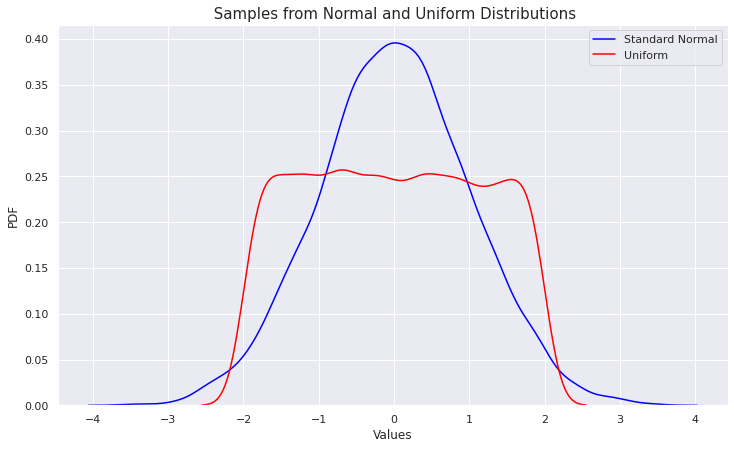

In [170]:
# Optional/Try later: Visualizing the distributions of created random samples using the Seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# Generating random data from the normal and Uniform distributions
standard_normal = np.random.normal(0,1,10000)
uniform = np.random.uniform(-2,2,10000)

# Plotting the distributions using the distplot function from the Seaborn library
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(standard_normal, color='blue', label='Standard Normal',hist=False)
sns.distplot(uniform, color='red', label='Uniform',hist=False)
plt.title(' Samples from Normal and Uniform Distributions',fontsize=15)
plt.xlabel('Values')
plt.ylabel('PDF')
plt.legend()
plt.show()

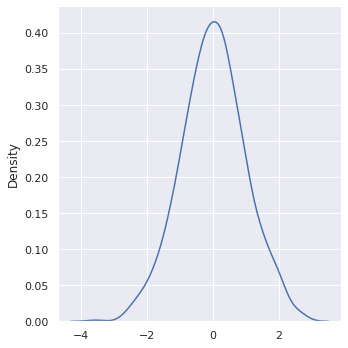

In [171]:
np.random.seed(1234)
gaussian_dist=np.random.normal(loc=0, scale=1, size=1000)
sns.displot(data= gaussian_dist, kind="kde")


 Count of gaussian samples greater than 0.75 is: 217


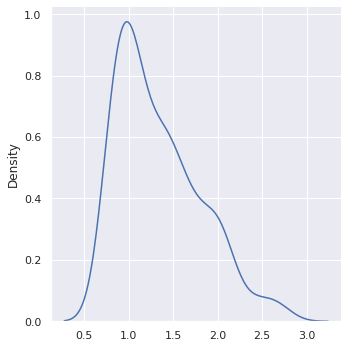

In [172]:
threshold =0.75
greater_than_threshold= gaussian_dist[np.where(gaussian_dist>threshold)]
sns.displot(data = greater_than_threshold, kind="kde")
print(f"\n Count of gaussian samples greater than {threshold} is: {len(greater_than_threshold)}")

### Attributes of NumPy arrays: ndim, dtype and shape

In [173]:
# creating higher dimensional array like a matrix
x = np.array([[2, 4, 6], [6, 8, 10]], np.int64)
print(x)

[[ 2  4  6]
 [ 6  8 10]]


In [174]:
print(type(x))

<class 'numpy.ndarray'>


In [175]:
print(x.ndim) # The 'ndim' attribute gives the dimension of the array

2


In [176]:
print(x.shape)

(2, 3)


In [177]:
print(x.dtype)

int64


### Other functions of interest provided by NumPy

#### `np.where()`


**np.where(condition, expression_1, expression_2)**<br>
For each element of the array,
- the first expression value is returned if the condition is true
- the second expression value is returned if the condition is false

In [178]:
x = np.array([2, 3, 1, 7, 2, 8])

In [179]:
np.where(x>3, 'buy', 'sell')

array(['sell', 'sell', 'sell', 'buy', 'sell', 'buy'], dtype='<U4')

- If only the condition is given (without any expressions), np.where() will return an array of index locations at which the condition is true

In [180]:
# The following by default returns an array of index locations at which the condition is true. 

np.where(x>3)

(array([3, 5]),)

In [181]:
# Fetching elements of array x which are greater than 3

x[np.where(x>3)]

array([7, 8])

#### Homework: Try other functions from NumPy such as np.mean, np.std, np.log, np.exp etc.

#### `np.log()`

In [182]:
x

array([2, 3, 1, 7, 2, 8])

In [183]:
z= np.log(x)
z

array([0.69314718, 1.09861229, 0.        , 1.94591015, 0.69314718,
       2.07944154])

In [184]:
np.exp(z)

array([2., 3., 1., 7., 2., 8.])

In [185]:
x = np.array([1,2,3])

In [186]:
x
print(x)

array([1, 2, 3])

[1 2 3]


## The `pandas` Library

`pandas` like `NumPy` is a key constituent of the scientific computing framework in Python.
It's a powerful tool which can perform data manipulation and other excel like operations at high speed. 

To give you a sense of how comprehensive it is, the [official documentation](https://pandas.pydata.org/pandas-docs/stable/) of `pandas` is over 3000 pages!

**`pandas` is built on top of NumPy.** Many of the more sophisticated statistical libraries such as `statsmodels` and `scikit-learn` in turn are built on top of `pandas`. Thus there is a **high degree of compatibility** among these libraries.<br><br>
Two of the most important data structures in `pandas` that we will extensively use are `Series` and `DataFrame`.

In [187]:
# importing the pandas library
import pandas as pd

[](pbq5.png)

### `Series` data structure in `pandas`
**`Series` can be thought of as a single 'column' of data in a spreadsheet, along with its index.** In other words, it is a 
one dimensional labelled-array.


In [188]:
# Consider a list which contains daily returns of a stock for 5 days.

returns_list = [0.05, 0.03, -0.04, 0.04, 0.02]

In [189]:
# We can easily convert it into a pandas Series

import pandas as pd

returns_series = pd.Series(returns_list)

print(type(returns_series))
print(returns_series)

<class 'pandas.core.series.Series'>
0    0.05
1    0.03
2   -0.04
3    0.04
4    0.02
dtype: float64


Notice that the output **automatically creates indices numbered from 0 to 4.** This is similar to a NumPy array except that
there are many additional features unique to pandas Series.

In [190]:
# We can provide a more meaningful index:

returns_series = pd.Series(returns_list, index=['Monday','Tuesday','Wednesday','Thursday','Friday'])
print(returns_series)

Monday       0.05
Tuesday      0.03
Wednesday   -0.04
Thursday     0.04
Friday       0.02
dtype: float64


In [191]:
returns_series.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], dtype='object')

In [192]:
# We can also change the index 

returns_series.index=['Mon','Tue','Wed','Thu','Fri']
print(returns_series)

Mon    0.05
Tue    0.03
Wed   -0.04
Thu    0.04
Fri    0.02
dtype: float64


In fact, **`Series` are like Python dictionaries**, with the index being analogous to the `keys` 
and the actual data equivalent to `values`. Even the syntax is similar to Python dictionaries.

In [193]:
returns_series['Thu']

0.04

Similarly, we can also manually create a Series object by passing in a dictionary object into the pd.Series() function:

In [194]:
a = {0: 'a', 1: 'b', 2: 'a', 3: 'b', 4: 'd', 5: 'b', 6: 'c', 7: 'a', 8: 'a', 9: 'c'}

# converting a dictionary to a Series
my_series = pd.Series(a)

In [195]:
my_series

0    a
1    b
2    a
3    b
4    d
5    b
6    c
7    a
8    a
9    c
dtype: object

In [196]:
my_series.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [197]:
my_series.values

array(['a', 'b', 'a', 'b', 'd', 'b', 'c', 'a', 'a', 'c'], dtype=object)

In [198]:
my_series.value_counts()

a    4
b    3
c    2
d    1
dtype: int64

In [199]:
my_series.unique()


array(['a', 'b', 'd', 'c'], dtype=object)

#### Some methods and attributes for Series

In [200]:
#fetching all the unique values only
my_series.unique()

# counting the occourances of each unique value
my_series.value_counts()

array(['a', 'b', 'd', 'c'], dtype=object)

a    4
b    3
c    2
d    1
dtype: int64

In [201]:
# checking the dimension and shape
# Note that the NumPy array attributes 'ndim' and 'shape' exist for pandas Series also
my_series.ndim
my_series.shape

1

(10,)

In [202]:
# The series.describe() gives us a statistical summary of the data in the Series container
my_series.describe()

count     10
unique     4
top        a
freq       4
dtype: object

In [203]:
returns_series.describe()

count    5.000000
mean     0.020000
std      0.035355
min     -0.040000
25%      0.020000
50%      0.030000
75%      0.040000
max      0.050000
dtype: float64

## `DataFrame` data structure in `pandas`

We can think of `DataFrame` like an Excel sheet with **multiple columns of data along with its index**, where each column is capable of handling different data types. In other words, it is a **two-dimensional labelled data container.**

### Creating a DataFrame manually using a python dictionary

In [204]:
# We can create a DataFrame manually, just by passing in a dictionary object into pd.DataFrame command
my_dataframe = pd.DataFrame({"Name":["Ash", "Jay", "Mario", "Vivek"], 
                             "Roll":[1, 2, 3, 4], 
                             "Marks":[35, 64, 34, 65]})
my_dataframe

,Name,Roll,Marks
0,Ash,1,35
1,Jay,2,64
2,Mario,3,34
3,Vivek,4,65


In [205]:
type(my_dataframe)

pandas.core.frame.DataFrame

 ### Deconstructing a pandas DataFrame

A DataFrame consists of three parts viz.
1. `index`
2. `columns`
3. `values`

In [206]:
my_dataframe.index

RangeIndex(start=0, stop=4, step=1)

In [207]:
type(my_dataframe.index)

pandas.core.indexes.range.RangeIndex

In [208]:
# Gives you details of the columns in the DataFrame
my_dataframe.columns

Index(['Name', 'Roll', 'Marks'], dtype='object')

In [209]:
my_dataframe.values

array([['Ash', 1, 35],
       ['Jay', 2, 64],
       ['Mario', 3, 34],
       ['Vivek', 4, 65]], dtype=object)

In [210]:
# values are of the type NumPy arrays
type(my_dataframe.values)

numpy.ndarray

**Notice that the values in a DataFrame container are of the type NumPy ndarray.**


### Reading csv/excel data into a DataFrame 

#### The working directory


We will now read a csv file into a pandas DataFrame, however
before we do that, **we need to make sure our csv file is stored in the current working directory.**
How do you check where your current working directory is? We need to take the help of the 'os' module for that!

In [211]:
import os

# Using getcwd() function from the os library to get the current working directory
os.getcwd()

#os.chdir('provide path here')      # You can use this command to change/set a folder as your working directory

'/home/solidsnake/epat/assignments'

In [212]:
# Reading a csv file into a DataFrame using read_csv() function from the pandas library

data1 = pd.read_csv("TCS.NS.csv")

data1.head(7)   # Useful way to get a quick look at your DataFrame
#data1.tail()
# try pd.read_excel()

,Date,High,Low,Open,Close,Volume,Adj Close
0,26-04-2010,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
1,27-04-2010,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
2,28-04-2010,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
3,29-04-2010,387.625000,377.799988,387.549988,379.875000,4622964,284.615387
4,30-04-2010,386.399994,381.274994,382.500000,382.700012,3690224,286.732086
5,03-05-2010,385.700012,377.049988,380.625000,383.399994,2416560,287.256409
6,04-05-2010,387.424988,378.399994,387.424988,380.500000,2896028,285.083679


In [213]:
# Here we're loading the csv file and specifying that the 'Date' column is to be assigned as index

data2 = pd.read_csv("TCS.NS.csv", index_col="Date")
data2.head(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
26-04-2010,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
27-04-2010,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
28-04-2010,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
29-04-2010,387.625000,377.799988,387.549988,379.875000,4622964,284.615387
30-04-2010,386.399994,381.274994,382.500000,382.700012,3690224,286.732086
03-05-2010,385.700012,377.049988,380.625000,383.399994,2416560,287.256409
04-05-2010,387.424988,378.399994,387.424988,380.500000,2896028,285.083679


In [214]:
type(data2.index)

pandas.core.indexes.base.Index

In [215]:
# We use parse_dates=True so that pandas recognizes our date column which makes filtering and data manipulation more convenient later
import pandas as pd
data3 = pd.read_csv("TCS.NS.csv", index_col="Date", parse_dates=True, dayfirst=True)
data3.head(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086
2010-05-03,385.700012,377.049988,380.625000,383.399994,2416560,287.256409
2010-05-04,387.424988,378.399994,387.424988,380.500000,2896028,285.083679


In [216]:
type(data3.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [217]:
# The .copy() method creates a copy of the original dataframe. 
# We will now create a copy and work with it.
df = data3.copy()

In [218]:
df.shape # Gives you an idea of how many rows and columns are there

(2460, 6)

In [219]:
df.info() #Information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2460 entries, 2010-04-26 to 2020-04-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2460 non-null   float64
 1   Low        2460 non-null   float64
 2   Open       2460 non-null   float64
 3   Close      2460 non-null   float64
 4   Volume     2460 non-null   int64  
 5   Adj Close  2460 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 134.5 KB


In [220]:
df.describe() # Gives a statistical summary for each column in the DataFrame

,High,Low,Open,Close,Volume,Adj Close
count,2460.000000,2460.000000,2460.000000,2460.000000,2.460000e+03,2460.000000
mean,1183.332782,1157.126909,1170.705962,1170.189163,2.761974e+06,1060.922468
std,528.957867,517.774422,524.050094,523.202750,2.413110e+06,553.775490
min,357.000000,342.625000,354.000000,349.774994,0.000000e+00,262.063446
25%,652.112518,640.087479,645.106247,645.581253,1.694905e+06,519.363129
50%,1207.625000,1186.250000,1198.259949,1198.760010,2.315492e+06,1071.833496
75%,1349.500000,1320.174988,1335.000000,1334.987457,3.239562e+06,1230.519287
max,2296.199951,2250.800049,2285.000000,2277.949951,8.806715e+07,2249.160400


### Selecting subsets of DataFrame

There are three key ways by which we select subsets of our dataset for further analysis.
* Using the indexing operator `[]`
* Using the label based indexing operator `.loc[]` 
* Using the integer based indexing operator`.iloc[]`

We'll now look at some use cases using these different indexers.

### Using the indexing operator `[]`

In [221]:
openprices = df['Open']
type(openprices)
# openprices is a Series object which has two components viz. index and the data (called values). There are NO columns

pandas.core.series.Series

In [222]:
closeprices = df['Close']
closeprices 

Date
2010-04-26     392.549988
2010-04-27     393.649994
2010-04-28     385.149994
2010-04-29     379.875000
2010-04-30     382.700012
                 ...     
2020-04-13    1759.250000
2020-04-15    1735.150024
2020-04-16    1716.050049
2020-04-17    1806.199951
2020-04-20    1818.650024
Name: Close, Length: 2460, dtype: float64

In [223]:
closeprices = df[['Close']]
# this is technically a DataFrame. Check the type and see for yourself

In [224]:
closeprices
type(closeprices)

,Close
Date,
2010-04-26,392.549988
2010-04-27,393.649994
2010-04-28,385.149994
2010-04-29,379.875000
2010-04-30,382.700012
...,...
2020-04-13,1759.250000
2020-04-15,1735.150024
2020-04-16,1716.050049


pandas.core.frame.DataFrame

In [225]:
# We can select multiple columns by passing a list of column names
# Order in which they are written doesn't matter

close_open = df[['Close', 'Open']]
close_open.head(10)

,Close,Open
Date,,
2010-04-26,392.549988,393.000000
2010-04-27,393.649994,392.975006
2010-04-28,385.149994,390.000000
2010-04-29,379.875000,387.549988
2010-04-30,382.700012,382.500000
2010-05-03,383.399994,380.625000
2010-05-04,380.500000,387.424988
2010-05-05,382.875000,375.000000
2010-05-06,383.549988,383.975006


In [226]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086


In [227]:
# creating a new column and initializing it with all zeroes

df['New'] = 0 
df.head()

,High,Low,Open,Close,Volume,Adj Close,New
Date,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,0
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,0
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,0
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0


In [228]:
# Deleting a column

del df['New'] 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086


In [229]:
# We can use methods on this subsetted data

df['Open'].sum()

2879936.6663703998

In [230]:
# Selecting specific rows
df[0:4]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387


In [231]:
# Selecting rows based on conditions

df[(df['Open']<1250)]    # single condition

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086
...,...,...,...,...,...,...
2017-10-05,1221.719971,1212.199951,1220.500000,1214.800049,1684686,1158.887939
2017-10-06,1227.500000,1214.030029,1215.000000,1223.319946,1389188,1167.015503
2017-10-09,1233.969971,1220.530029,1220.530029,1227.050049,1773616,1170.573853


In [232]:
mask= (df['Open']<1250) & (df['Close']>1260)
df[mask]    # multiple conditions

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-07-22,1270.000000,1230.949951,1232.500000,1266.199951,2399016,1078.490723
2014-08-25,1264.250000,1233.449951,1235.000000,1261.030029,3143512,1078.225220
2015-02-13,1273.880005,1230.119995,1235.000000,1269.380005,4158326,1094.131836
2015-05-07,1276.880005,1226.849976,1232.449951,1272.619995,3205028,1096.924438
2015-10-20,1265.000000,1247.800049,1248.119995,1263.380005,2695084,1114.176270
2016-03-31,1275.000000,1236.069946,1239.150024,1260.150024,4363964,1126.495728
2016-05-25,1266.469971,1240.500000,1240.500000,1263.219971,1548678,1129.239868
2016-07-14,1264.500000,1235.500000,1243.000000,1260.949951,2699988,1150.844116
2017-05-18,1286.000000,1221.119995,1225.000000,1268.099976,5138594,1176.335449


In [233]:
# Another way is to use df.query
df.query('Open<1250 and Close>1260')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-07-22,1270.000000,1230.949951,1232.500000,1266.199951,2399016,1078.490723
2014-08-25,1264.250000,1233.449951,1235.000000,1261.030029,3143512,1078.225220
2015-02-13,1273.880005,1230.119995,1235.000000,1269.380005,4158326,1094.131836
2015-05-07,1276.880005,1226.849976,1232.449951,1272.619995,3205028,1096.924438
2015-10-20,1265.000000,1247.800049,1248.119995,1263.380005,2695084,1114.176270
2016-03-31,1275.000000,1236.069946,1239.150024,1260.150024,4363964,1126.495728
2016-05-25,1266.469971,1240.500000,1240.500000,1263.219971,1548678,1129.239868
2016-07-14,1264.500000,1235.500000,1243.000000,1260.949951,2699988,1150.844116
2017-05-18,1286.000000,1221.119995,1225.000000,1268.099976,5138594,1176.335449


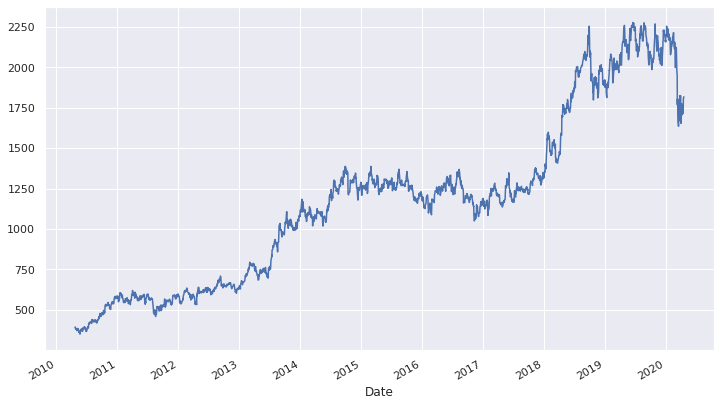

In [234]:
df["Close"].plot();

###  Using label based  indexing operator `.loc[]`

It selects data based on the **'label'** of the rows and columns. Also, it can simultaneously select subsets of rows and columns.

In [236]:
# Selecting a single row by label

df.loc['2019-01-07'] 

High         1.908800e+03
Low          1.881000e+03
Open         1.891800e+03
Close        1.897900e+03
Volume       1.856423e+06
Adj Close    1.851914e+03
Name: 2019-01-07 00:00:00, dtype: float64

In [237]:
# using the slice notation : to select a range of columns or rows
# The last value is included here compared to other data structures like Python lists

df.loc['2019-01-07': '2019-02-03'] 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-07,1908.800049,1881.000000,1891.800049,1897.900024,1856423,1851.913818
2019-01-08,1906.400024,1883.300049,1905.400024,1893.550049,1691756,1847.669312
2019-01-09,1919.000000,1866.699951,1907.400024,1886.949951,2414376,1841.229126
2019-01-10,1905.000000,1872.099976,1890.000000,1888.550049,3053461,1842.790649
2019-01-11,1875.000000,1835.000000,1870.000000,1842.550049,9209862,1797.905273
2019-01-14,1851.000000,1810.000000,1850.000000,1813.250000,3615370,1769.314941
2019-01-15,1869.349976,1808.000000,1810.000000,1867.800049,7711653,1822.543213
2019-01-16,1875.000000,1847.000000,1870.000000,1870.150024,2359280,1824.836304
2019-01-17,1898.000000,1871.300049,1878.000000,1894.300049,2625816,1852.363159


In [238]:
df.loc['2019-05-02':] ## slicing from the specified date to the end

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-02,2259.399902,2211.100098,2255.000000,2215.399902,2457699,2166.354492
2019-05-03,2186.050049,2125.000000,2185.000000,2132.000000,3780886,2084.800537
2019-05-06,2165.000000,2108.500000,2110.000000,2157.850098,2891422,2110.078613
2019-05-07,2184.350098,2138.800049,2160.050049,2151.949951,2201698,2104.309082
2019-05-08,2168.000000,2130.399902,2151.000000,2152.850098,1824895,2105.189453
...,...,...,...,...,...,...
2020-04-13,1787.000000,1746.000000,1761.000000,1759.250000,2990438,1759.250000
2020-04-15,1812.000000,1727.800049,1785.000000,1735.150024,4761399,1735.150024
2020-04-16,1764.900024,1675.050049,1709.949951,1716.050049,6245533,1716.050049


In [239]:
df.loc[:'2019-01-16'] ## slicing from the start to the specified date


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086
...,...,...,...,...,...,...
2019-01-10,1905.000000,1872.099976,1890.000000,1888.550049,3053461,1842.790649
2019-01-11,1875.000000,1835.000000,1870.000000,1842.550049,9209862,1797.905273
2019-01-14,1851.000000,1810.000000,1850.000000,1813.250000,3615370,1769.314941


In [240]:
df.loc['2019-01-07': '2019-02-03':3] ## slicing from the specified date to specified date and selecting every
# 3rd day

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-07,1908.800049,1881.000000,1891.800049,1897.900024,1856423,1851.913818
2019-01-10,1905.000000,1872.099976,1890.000000,1888.550049,3053461,1842.790649
2019-01-15,1869.349976,1808.000000,1810.000000,1867.800049,7711653,1822.543213
2019-01-18,1904.199951,1876.000000,1881.000000,1900.650024,1683728,1858.572632
2019-01-23,1906.099976,1870.000000,1901.000000,1875.599976,2578169,1834.077148
2019-01-28,1962.000000,1925.500000,1933.000000,1955.000000,2769033,1911.719360
2019-01-31,2019.750000,1985.000000,1987.000000,2014.099976,4094319,1969.510864


In [241]:
# Selecting rows and columns simultaneously

df.loc['2019-01-07': '2019-02-03',['Open','High','Low']]

,Open,High,Low
Date,,,
2019-01-07,1891.800049,1908.800049,1881.000000
2019-01-08,1905.400024,1906.400024,1883.300049
2019-01-09,1907.400024,1919.000000,1866.699951
2019-01-10,1890.000000,1905.000000,1872.099976
2019-01-11,1870.000000,1875.000000,1835.000000
2019-01-14,1850.000000,1851.000000,1810.000000
2019-01-15,1810.000000,1869.349976,1808.000000
2019-01-16,1870.000000,1875.000000,1847.000000
2019-01-17,1878.000000,1898.000000,1871.300049


In [242]:
# remember that when we created the 'data2' DataFrame object, 
# we didn't ask Python to parse the index as a date

data2.loc['Aug 2016'].tail()
# so we get an error.

KeyError: 'Aug 2016'

In [243]:
# However, for 'data3' we used parse_dates=True
data3.loc['Aug 2016'].tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-25,1294.849976,1263.000000,1290.000000,1275.530029,1939690,1170.199585
2016-08-26,1286.280029,1258.599976,1279.900024,1262.469971,1250314,1158.218018
2016-08-29,1267.469971,1233.380005,1267.469971,1250.280029,1488728,1147.034912
2016-08-30,1274.900024,1250.619995,1255.000000,1272.069946,1444026,1167.025269
2016-08-31,1275.000000,1250.430054,1275.000000,1255.650024,3231668,1151.961182


In [249]:
# When the index of the DataFrame is a DatetimeIndex object as in the case of data3,
# there is increased flexibility in manipulation using the index labels.

# Remember that when we created the data3 DataFrame object,
# we explicitly told Python to parse the index as a date, unlike the data2.

data3.loc['Oct 2019'][data3['Volume']>2000000]

/tmp/ipykernel_34646/2071635845.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data3.loc['Oct 2019'][data3['Volume']>2000000]


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-01,2095.949951,2039.699951,2095.949951,2059.949951,3342877,2035.389893
2019-10-03,2081.149902,2046.150024,2070.000000,2060.250000,2317618,2035.686279
2019-10-04,2087.949951,2054.949951,2060.600098,2079.350098,2163251,2054.558838
2019-10-07,2094.500000,2041.000000,2080.000000,2047.699951,2177916,2023.285767
2019-10-09,2060.000000,2015.500000,2060.000000,2020.099976,2066920,1996.015015
2019-10-10,2039.050049,1997.099976,2028.000000,2004.449951,2881452,1980.551514
2019-10-11,1995.000000,1925.000000,1931.000000,1986.849976,12593069,1963.161377
2019-10-14,2032.750000,1968.000000,1995.000000,2021.000000,3510704,1996.904175
2019-10-15,2047.000000,2022.699951,2032.000000,2037.300049,2261310,2013.010010


In [250]:
# fetching the same in two steps
data3.loc['Oct 2019']
[data3['Volume']>2000000]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-01,2095.949951,2039.699951,2095.949951,2059.949951,3342877,2035.389893
2019-10-03,2081.149902,2046.150024,2070.000000,2060.250000,2317618,2035.686279
2019-10-04,2087.949951,2054.949951,2060.600098,2079.350098,2163251,2054.558838
2019-10-07,2094.500000,2041.000000,2080.000000,2047.699951,2177916,2023.285767
2019-10-09,2060.000000,2015.500000,2060.000000,2020.099976,2066920,1996.015015
2019-10-10,2039.050049,1997.099976,2028.000000,2004.449951,2881452,1980.551514
2019-10-11,1995.000000,1925.000000,1931.000000,1986.849976,12593069,1963.161377
2019-10-14,2032.750000,1968.000000,1995.000000,2021.000000,3510704,1996.904175
2019-10-15,2047.000000,2022.699951,2032.000000,2037.300049,2261310,2013.010010


[Date
 2010-04-26    True
 2010-04-27    True
 2010-04-28    True
 2010-04-29    True
 2010-04-30    True
               ... 
 2020-04-13    True
 2020-04-15    True
 2020-04-16    True
 2020-04-17    True
 2020-04-20    True
 Name: Volume, Length: 2460, dtype: bool]

In [251]:
# We can also use the following format for date label for data3 DataFrame

data3.loc['08-2016'].tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-25,1294.849976,1263.000000,1290.000000,1275.530029,1939690,1170.199585
2016-08-26,1286.280029,1258.599976,1279.900024,1262.469971,1250314,1158.218018
2016-08-29,1267.469971,1233.380005,1267.469971,1250.280029,1488728,1147.034912
2016-08-30,1274.900024,1250.619995,1255.000000,1272.069946,1444026,1167.025269
2016-08-31,1275.000000,1250.430054,1275.000000,1255.650024,3231668,1151.961182


### Using the integer based indexing operator `.iloc[]`

It selects data based on the **integer locations** of the rows and columns. Very similar to the .loc[] operator. One difference is that `.loc` includes the last value of index when slicing, whereas `.iloc` excludes it like the rest of Python.

In [252]:
df =data3.copy()

In [253]:
# Selecting a single row

df.iloc[4] 

High         3.864000e+02
Low          3.812750e+02
Open         3.825000e+02
Close        3.827000e+02
Volume       3.690224e+06
Adj Close    2.867321e+02
Name: 2010-04-30 00:00:00, dtype: float64

In [254]:
# Selecting multiple rows

df.iloc[[4, 8, 20]] 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086
2010-05-06,385.450012,379.600006,383.975006,383.549988,2580872,287.368897
2010-05-24,365.000000,356.350006,362.500000,358.799988,2885428,268.825287


In [255]:
# using the slice notation : to select a range of columns or rows

df.iloc[0:6] 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086
2010-05-03,385.700012,377.049988,380.625000,383.399994,2416560,287.256409


In [256]:
 # starting with 0th position and every alternate row till 6th(excluding the 6th)
    
df.iloc[0:6:2]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-26,395.500000,390.100006,393.0,392.549988,2512548,294.111939
2010-04-28,391.975006,382.500000,390.0,385.149994,2400382,288.567657
2010-04-30,386.399994,381.274994,382.5,382.700012,3690224,286.732086


In [257]:
# Selecting rows and columns simultaneously with .iloc

df.iloc[[4, 5], [0,3]] # selecting two rows and two columns

,High,Close
Date,,
2010-04-30,386.399994,382.700012
2010-05-03,385.700012,383.399994


In [258]:
df.iloc[4:6, [0, 3]] # selecting a slice of rows and two columns

,High,Close
Date,,
2010-04-30,386.399994,382.700012
2010-05-03,385.700012,383.399994


In [276]:
# Adj Close and volume and the last 5 rows using iloc
df.iloc[-5:,[5,4]]

,Adj Close,Volume
Date,,
2020-04-13,1759.250000,2990438
2020-04-15,1735.150024,4761399
2020-04-16,1716.050049,6245533
2020-04-17,1806.199951,9895823
2020-04-20,1818.650024,3244282


### Visualization: Plotting the data using Matplotlib library 

One of the great features about `pandas` is how it works so symbiotically with some of the other popular Python packages such as `NumPy` and `Matplotlib`. Under the hood, the `values` of the `pandas Series` and the `pandas Dataframe` objects are `NumPy ndarrays`. 

We will use `matplotlib` in conjunction with `pandas` to plot and visualize our data. You can read and learn more about it [here](https://matplotlib.org/api/pyplot_summary.html).

<AxesSubplot:xlabel='Date'>

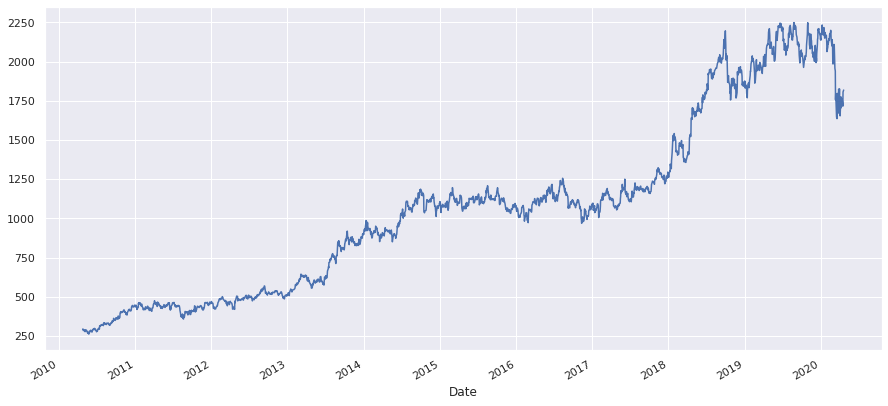

In [277]:
# You can do a quick plot of the Close prices over time using the .plot() function

import matplotlib.pyplot as plt
%matplotlib inline

df['Adj Close'].plot(figsize=(15,7)) 
plt.show()


For plotting multiple lines on the same graph, **pass a list of column names to the plot() method.**


<AxesSubplot:xlabel='Date'>

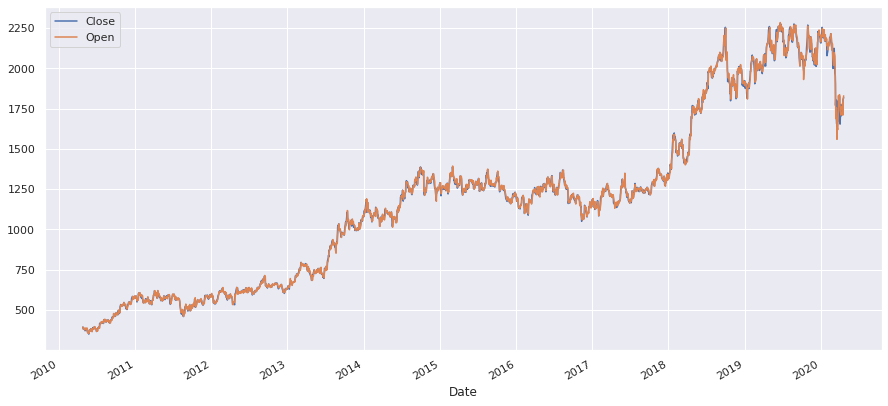

In [278]:
df[['Close','Open']].plot(figsize=(15,7))
plt.show()

In [261]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086


## Some commonly done calculations in quantitative trading

In [279]:
# Recreating a copy of data3
df = data3.copy()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086


### Percentage change calculations

In [275]:
# Computing the percentage change between today's Close and previous day's Close using the method pct_change()

df['Close_to_Close'] = 100 * df['Close'].pct_change()
df.head()

,High,Low,Open,Close,Volume,Adj Close,Close_to_Close
Date,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,NaN
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.280221
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-2.159279
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.369595
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.743669


In [280]:
# Computing the percentage change between today's Close and Open
# This is an example of vectorized operation

df['intraday_return'] = 100 * (df['Close'] / df['Open'] - 1) 
df.head()

,High,Low,Open,Close,Volume,Adj Close,intraday_return
Date,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291


### The shift operator

The shift operator **time-shifts the specified columns either forward or backward by the # of steps specified.** 
Here shift(1) brings the Close price column down by one step. The shift operator is helpful in making 
vectorized operations possible in certain cases.

In [282]:
# Creating a new column called 'Previous_Close' by using the shift operator on Close column.

df['Previous_Close'] =  df['Close'].shift()
df.head()

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close
Date,,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507,NaN
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764,392.549988
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591,393.649994
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387,385.149994
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291,379.875000


In [283]:
# Calculating the percentage return between previous close and today's open

df['overnight_return'] = 100*(df['Open']/df['Previous_Close']-1)
df.head()

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return
Date,,,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507,NaN,NaN
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764,392.549988,0.108271
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591,393.649994,-0.927218
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387,385.149994,0.623132
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291,379.875000,0.691017


In [286]:
df["2 day back Close"] = df["Close"].shift(2)
df.head()

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return,MA_5,2 day back Close
Date,,,,,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507,NaN,NaN,NaN,NaN
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764,392.549988,0.108271,NaN,NaN
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591,393.649994,-0.927218,NaN,392.549988
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387,385.149994,0.623132,NaN,393.649994
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291,379.875000,0.691017,386.784998,385.149994


### Moving Average calculations using .rolling()

In [284]:
# Creting a new column called 'MA' containing 5 day Moving Average of Close prices.

n = 5

df['MA_5'] = df['Close'].rolling(window=n).mean()
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return,MA_5
Date,,,,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507,NaN,NaN,NaN
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764,392.549988,0.108271,NaN
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591,393.649994,-0.927218,NaN
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387,385.149994,0.623132,NaN
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291,379.875000,0.691017,386.784998
2010-05-03,385.700012,377.049988,380.625000,383.399994,2416560,287.256409,0.729062,382.700012,-0.542203,384.954999
2010-05-04,387.424988,378.399994,387.424988,380.500000,2896028,285.083679,-1.787440,383.399994,1.049816,382.325000
2010-05-05,384.000000,370.075012,375.000000,382.875000,4371230,286.863068,2.100000,380.500000,-1.445466,381.870001
2010-05-06,385.450012,379.600006,383.975006,383.549988,2580872,287.368897,-0.110689,382.875000,0.287302,382.604999


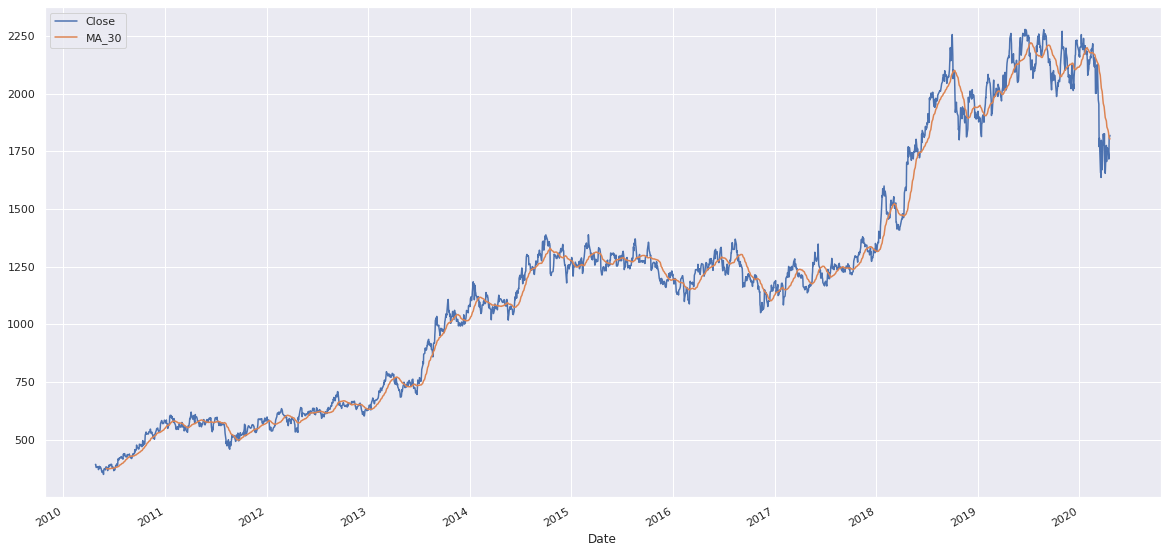

In [299]:
df['MA_30'] = df['Close'].rolling(window=30).mean()
df[["Close", "MA_30"]].plot(figsize=(20, 10));

### Working with missing/NaN values

In [287]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return,MA_5,2 day back Close
Date,,,,,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507,NaN,NaN,NaN,NaN
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764,392.549988,0.108271,NaN,NaN
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591,393.649994,-0.927218,NaN,392.549988
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387,385.149994,0.623132,NaN,393.649994
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291,379.875000,0.691017,386.784998,385.149994


In [288]:
# Find out the number of missing values in each column
df.isnull().sum()

High                0
Low                 0
Open                0
Close               0
Volume              0
Adj Close           0
intraday_return     0
Previous_Close      1
overnight_return    1
MA_5                4
2 day back Close    2
dtype: int64

In [300]:
df.dropna(axis=0).head()  #deletes all rows with NaN values and creates a new dataframe (leaves the original dataframe unchanged)

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return,MA_5,2 day back Close,MA_20,MA_30
Date,,,,,,,,,,,,,
2010-06-04,384.850006,377.600006,382.725006,382.674988,1368210,286.713226,-0.013069,382.725006,0.000000,376.729999,377.125000,372.039996,375.858330
2010-06-07,378.899994,368.000000,374.950012,376.625000,1734922,282.180420,0.446723,382.674988,-2.018678,377.750000,382.725006,371.614996,375.327497
2010-06-08,381.000000,373.500000,377.000000,375.100006,2242222,281.037903,-0.503977,376.625000,0.099569,378.850000,382.674988,371.462497,374.709164
2010-06-09,379.274994,365.500000,376.000000,366.524994,4867400,274.613129,-2.519948,375.100006,0.239934,376.729999,376.625000,370.802496,374.088331
2010-06-10,376.500000,365.000000,365.000000,375.250000,1796036,281.150208,2.808219,366.524994,-0.416068,375.234998,375.100006,370.424997,373.934164


In [301]:
df.dropna(axis=1).head() # deletes all columns with NaN values and creates a new dataframe (leaves the original dataframe unchanged)
# df.dropna(axis=1,inplace=True)

,High,Low,Open,Close,Volume,Adj Close,intraday_return
Date,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291


In [302]:
df.fillna( value = 0)

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return,MA_5,2 day back Close,MA_20,MA_30
Date,,,,,,,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764,392.549988,0.108271,0.000000,0.000000,0.000000,0.000000
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591,393.649994,-0.927218,0.000000,392.549988,0.000000,0.000000
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387,385.149994,0.623132,0.000000,393.649994,0.000000,0.000000
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291,379.875000,0.691017,386.784998,385.149994,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-13,1787.000000,1746.000000,1761.000000,1759.250000,2990438,1759.250000,-0.099375,1766.150024,-0.291596,1732.049975,1705.449951,1736.547491,1841.614994
2020-04-15,1812.000000,1727.800049,1785.000000,1735.150024,4761399,1735.150024,-2.792716,1759.250000,1.463692,1748.239990,1766.150024,1734.812494,1828.666658
2020-04-16,1764.900024,1675.050049,1709.949951,1716.050049,6245533,1716.050049,0.356741,1735.150024,-1.452328,1736.410010,1759.250000,1730.299994,1815.684993


In [303]:
df.fillna(method='bfill').head()

# Try df.fillna(method='ffill') after the lecture

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return,MA_5,2 day back Close,MA_20,MA_30
Date,,,,,,,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507,392.549988,0.108271,386.784998,392.549988,378.409998,375.85833
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764,392.549988,0.108271,386.784998,392.549988,378.409998,375.85833
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591,393.649994,-0.927218,386.784998,392.549988,378.409998,375.85833
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387,385.149994,0.623132,386.784998,393.649994,378.409998,375.85833
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291,379.875000,0.691017,386.784998,385.149994,378.409998,375.85833


In [304]:
# Filling NaNs in a particular column
# Providing 'inplace=True' modifies the original DataFrame

df['MA_5'].fillna( value = np.mean(df['MA_5']),inplace=True)  
df.head()

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return,MA_5,2 day back Close,MA_20,MA_30
Date,,,,,,,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507,NaN,NaN,1170.322877,NaN,NaN,NaN
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764,392.549988,0.108271,1170.322877,NaN,NaN,NaN
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591,393.649994,-0.927218,1170.322877,392.549988,NaN,NaN
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387,385.149994,0.623132,1170.322877,393.649994,NaN,NaN
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291,379.875000,0.691017,386.784998,385.149994,NaN,NaN


### The correlation matrix

In [305]:
df.corr()

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return,MA_5,2 day back Close,MA_20,MA_30
High,1.000000,0.999538,0.999647,0.999719,0.010528,0.997228,-0.028375,0.999577,0.025181,0.997524,0.998856,0.996214,0.994577
Low,0.999538,1.000000,0.999648,0.999675,0.000098,0.996969,-0.029878,0.999494,0.028207,0.997346,0.998651,0.995511,0.993645
Open,0.999647,0.999648,1.000000,0.999337,0.004598,0.996756,-0.047003,0.999822,0.029688,0.997631,0.999074,0.996103,0.994319
Close,0.999719,0.999675,0.999337,1.000000,0.005409,0.997374,-0.014083,0.999217,0.026832,0.997247,0.998450,0.995673,0.993951
Volume,0.010528,0.000098,0.004598,0.005409,1.000000,0.013700,0.024783,0.006755,-0.077963,0.007203,0.006953,0.010693,0.013880
Adj Close,0.997228,0.996969,0.996756,0.997374,0.013700,1.000000,-0.015012,0.996692,0.023851,0.995073,0.996025,0.993971,0.992648
intraday_return,-0.028375,-0.029878,-0.047003,-0.014083,0.024783,-0.015012,1.000000,-0.045546,-0.086235,-0.040796,-0.045810,-0.046074,-0.042310
Previous_Close,0.999577,0.999494,0.999822,0.999217,0.006755,0.996692,-0.045546,1.000000,0.012737,0.998175,0.999217,0.996271,0.994479
overnight_return,0.025181,0.028207,0.029688,0.026832,-0.077963,0.023851,-0.086235,0.012737,1.000000,0.016225,0.014154,0.016953,0.016013
MA_5,0.997524,0.997346,0.997631,0.997247,0.007203,0.995073,-0.040796,0.998175,0.016225,1.000000,0.998791,0.997365,0.995568


In [306]:
df[['intraday_return','overnight_return']].corr()

,intraday_return,overnight_return
intraday_return,1.000000,-0.086235
overnight_return,-0.086235,1.000000


### The apply method

In [307]:
# Creating a function to calculate the intraday range
def daily_range(x):
    return x['Close']-x['Open']

In [308]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return,MA_5,2 day back Close,MA_20,MA_30
Date,,,,,,,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507,NaN,NaN,1170.322877,NaN,NaN,NaN
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764,392.549988,0.108271,1170.322877,NaN,NaN,NaN
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591,393.649994,-0.927218,1170.322877,392.549988,NaN,NaN
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387,385.149994,0.623132,1170.322877,393.649994,NaN,NaN
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291,379.875000,0.691017,386.784998,385.149994,NaN,NaN


In [309]:
# Creating a new column by applying the function we defined above to the DataFrame df
df['daily_range'] = df.apply(daily_range, axis=1)
df.head()

,High,Low,Open,Close,Volume,Adj Close,intraday_return,Previous_Close,overnight_return,MA_5,2 day back Close,MA_20,MA_30,daily_range
Date,,,,,,,,,,,,,,
2010-04-26,395.500000,390.100006,393.000000,392.549988,2512548,294.111939,-0.114507,NaN,NaN,1170.322877,NaN,NaN,NaN,-0.450012
2010-04-27,394.950012,390.524994,392.975006,393.649994,2621234,294.936157,0.171764,392.549988,0.108271,1170.322877,NaN,NaN,NaN,0.674988
2010-04-28,391.975006,382.500000,390.000000,385.149994,2400382,288.567657,-1.243591,393.649994,-0.927218,1170.322877,392.549988,NaN,NaN,-4.850006
2010-04-29,387.625000,377.799988,387.549988,379.875000,4622964,284.615387,-1.980387,385.149994,0.623132,1170.322877,393.649994,NaN,NaN,-7.674988
2010-04-30,386.399994,381.274994,382.500000,382.700012,3690224,286.732086,0.052291,379.875000,0.691017,386.784998,385.149994,NaN,NaN,0.200012


### Writing back to excel

In [311]:
df.to_excel('modified_df.xlsx')
#df.to_csv('modified_df.csv')

### A little homework!

Search and find out the syntax and use cases for the following:
- **df.set_index()**
- **df.concat()**
- **df.groupby()**
<br>
<br>
*An awesome source for beginners:https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html*

<a id = 'references'></a>
## References

1. The Official Python documentation - https://docs.python.org/3/contents.html
2. Python Basics - https://www.quantinsti.com/Python-Basics-Handbook.pdf
3. Jupyter Lab - http://jupyterlab.readthedocs.io/en/stable/
6. `pandas` documentation - https://pandas.pydata.org/pandas-docs/stable/
7. Learning pandas, Michael Heydt - https://www.amazon.com/Learning-Pandas-Python-Discovery-Analysis/dp/1783985127
8. Style Guide for Python Code - https://www.python.org/dev/peps/pep-0008/
9. Dealing With Error And Exceptions In Python - https://www.quantinsti.com/blog/dealing-python-error-exceptions/
10. Python Exception: Raising And Catching Exceptions In Python - https://www.quantinsti.com/blog/python-exception/
11. Don't repeat yourself: https://en.wikipedia.org/wiki/Don%27t_repeat_yourself
12. `Matplotlib` - https://matplotlib.org/api/pyplot_summary.html